### COGS 108 - Final Project

# Gun Laws and Mass Shootings




### Group Member Names & IDs

Duy Ngo - A14695298
 <br>Hanyang(Patrick) Liu - A13924097
 <br>Behnam Shamloufard - A15708967
 <br>Josephine Reyes - A13850298
 <br>Caleb Lopez - A14899660
 <br>Fatin Pasha - A14577145




# Introduction & Background








### Overview

Mass shootings in the United States have prompted controversial debates over the main cause of gun violence. In our project, we explore the relationship between the frequency of mass shootings and the strictness of gun laws for each state. We pulled four data sets that include the incident date, state, city or county, address, # of people killed, and # of people injured. We also utilize a data set providing the gun laws strength score for 2018 based off a letter grade from A to F, with A being more strict and F being more lenient. 

### Research Question

What is the relationship between the local gun policy and the number of mass shootings that occur within each state? More specifically, does a state with a strict gun policy typically have fewer mass shootings?


### Background & Prior Work

The recent mass shootings in El Paso, Texas, and Dayton, Ohio – along with many others throughout the year of 2019 alone, have brought our group’s attention to research about mass shootings in the United States. With the US having the highest levels of gun violence compared to any other developed country, we decided to research if having a stricter gun policy will help decrease the number of mass shootings.

Gun ownership in the United States is a unique right that is guaranteed by this nation's Second Amendment. This is unique because most developed countries in the world have various forms of stricter gun laws. The concept of gun ownership as a right in the United States is rooted in the nation’s historic background and the revolutionary war, as it played a major role in colonial and independent United States. However, this right has recently been under scrutiny as an increasing number of incidents involving guns end in tragedy. Cases such as the Orlando Pulse Nighclub shooting, San Bernardino shooting, Las Vegas Harvest Festival shooting, Stoneman Douglas High School shooting and recently the school shooting at Santa Clarita are all instances which shook the nation as a whole. Such incidents fueled different groups in society to question the purpose and existence of the Second Amendment of the Constitution.

The concept of gun ownership is expected to be a topic of debate this year because of the upcoming presidential election in 2020. In the previous presidential election season of 2016, gun laws had been a subject of serious debate considering how certain mass shootings had occurred recently. This project aims to analyze the relationship between the gun laws of individual states and the number of mass shootings that occurred in those respective states. The purpose of this project is to potentially establish a pattern between gun laws and cases of mass shootings by analyzing a relationship between gun laws, population, and number of mass shootings in individual American states in comparison to other states.

While mass shootings are the focus of our data and data analysis, it is important to note that there are various definitions and occurances within the category of gun deaths. It is significant to define considering most cases of existing research on this topic is taking into account these other forms of gun death (i.e. violent crime, suicide). It is also significant to state that correlation with mass shootings might be different from the correlation to gun deaths in general. In fact the majority of gun deaths are not due to mass shootings but rather to suicides.

The motivating factor that further fueled this project are the conflicting research and findings which contradicted the relationship between gun laws and mass shootings. For this project, the concept of correlation between stricter gun laws and mass shootings have been discussed in two papers. The first research concluded that there is a relationship between mass shootings and gun law (Reeping, Cerdá, Kalesan, Wiebe, Galea & Branas, 2019). The second research found no correlation between gun regulation and occurence of mass shooting (Lewis, 2018). The conflicting research regarding the subject prompted us to investigate the relationship between mass shooting and gun regulations.

Citations: <br>
Lewis, J. S. (2018). The Relationship between Gun Control Strictness and Mass Murder in the United States: A National Study 2009-2015. International Social Science Review, 94(2). Retrieved from https://digitalcommons.northgeorgia.edu/cgi/viewcontent.cgi?article=1287&context=issr <br><br>
Reeping, P. M., Cerdá, M., Kalesan, B., Wiebe, D. J., Galea, S., & Branas, C. C. (2019). State gun laws, gun ownership, and mass shootings in the US: cross sectional time series. Bmj, l542. doi: 10.1136/bmj.l542

Links: 
<br>https://www.gunviolencearchive.org/methodology

https://www.businessinsider.com/gun-control-research-how-policies-can-reduce-deaths-2019-8#in-2017-the-most-recent-year-for-which-data-is-available-39773-people-in-the-us-died-from-firearms-according-to-the-centers-for-disease-control-and-prevention-cdc-1

https://www.nytimes.com/interactive/2017/10/05/upshot/how-to-reduce-mass-shooting-deaths-experts-say-these-gun-laws-could-help.html

https://www.hbs.edu/faculty/Publication%20Files/16-126_ce055015-fc1c-4a8c-9a8a-8a9361d808bb.pdf

https://www.bmj.com/content/364/bmj.l542


### Hypothesis

Since gun regulation policies vary from state to state across the U.S. , we predict that the number of mass shootings in a state is strongly correlated with how strict its gun policy is. 

We will assume that gun laws that are more restrictive will make it less likely for criminals, people with mental health illnesses, and people with histories of violence to have access to guns. Thus, states with permissive gun laws will have a higher rate of mass shootings than other states on the restrictive end.



# Datasets

### a) Mass shootings record from 2015-2018 
Link: https://www.gunviolencearchive.org/reports
Number of Observations: 1,450 observations

Description: This dataset contains the record of every mass shooting in the U.S from 2015 to 2018.
Each data row has the following columns: Incident Date, State, City/County, Address, #(of people) Killed, #Injured, and Operations (Used to provide links to sources). 
<br>For our research question, we choose to use these columns:
- Incident Date
- State
- City/County
- #Killed 
- #Injured

Definition of mass shooting: Four or more shot and/or killed in a single event [incident], at the same general time and location, not including the shooter.

### b) State Population Totals and Components of Change: 2010-2018
Link: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html
<br>Number of Observations: 57

Description: This dataset contains a record of population estimates from 2010-2018. 
<br>For our research question, we choose to use these columns:
- NAME: of state
- POPESTIMATE2015: population estimate for 2015
- POPESTIMATE2016: population estimate for 2016
- POPESTIMATE2017: population estimate for 2017
- POPESTIMATE2018: population estimate for 2018

### c) Gun Law Score Card
Link: https://lawcenter.giffords.org/scorecard/#MT
<br> Number of Observations: 50

Description: This data set contains a record of each state's gun death rate, along with a corresponding "score" associated with how strong each respective state's gun laws are. Each data row has the following columns: Gun Law Strength(Ranked), State, 2018 Grade, Gun Death Rate (Ranked), Gun Death Rate Per 100K. All columns were used in our analysis. 

# 1. Project Setup







### 1.1 Import Libraries

In [99]:
# !pip install --user geopandas
# !pip install --user libpysal
# !pip install --user descartes


In [100]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Erase warnings
import warnings
warnings.filterwarnings("ignore")
#For geo infomation processing
import geopandas as gpd
import libpysal
from shapely.geometry import Point
from scipy.stats import chi2_contingency
from scipy import stats

### 1.2 Configure Libraries

In [101]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 15
pd.options.display.max_columns = 20

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

### 1.3 Read data from csv file

In [102]:
data_2018 = pd.read_csv('2018.csv')
data_2017 = pd.read_csv('2017.csv')
data_2016 = pd.read_csv('2016.csv')
data_2015 = pd.read_csv('2015.csv')

In [103]:
data_2018

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2018",Ohio,Cleveland,4462 Denison Ave,3,2,NaN
1,"December 29, 2018",Ohio,Lima,904 S Main St,1,3,NaN
2,"December 28, 2018",Missouri,Saint Charles,150 Whetstone Dr,4,1,NaN
3,"December 24, 2018",Louisiana,Lutcher,2176 Main St,2,2,NaN
4,"December 23, 2018",Missouri,Springfield,1042 W College St,1,6,NaN
...,...,...,...,...,...,...,...
332,"January 7, 2018",Alabama,Union Springs,US-29,1,5,NaN
333,"January 7, 2018",Florida,Plantation,5225 W Broward Blvd,0,4,NaN
334,"January 5, 2018",Mississippi,Hattiesburg,6168 US 49,0,6,NaN
335,"January 4, 2018",Arkansas,Brinkley,615 W 6th St,1,3,NaN


In [104]:
data_2017

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2017",Colorado,Littleton (Highlands Ranch),3404 E County Line Rd,2,6,NaN
1,"December 31, 2017",Illinois,Chicago,2335 Howard St,0,4,NaN
2,"December 31, 2017",New Jersey,Long Branch,635 Wall St,4,0,NaN
3,"December 27, 2017",Nevada,Las Vegas,3750 E Bonanza Rd,2,2,NaN
4,"December 26, 2017",Florida,Miami,NW 18th Ave and 86th Ter,0,5,NaN
...,...,...,...,...,...,...,...
341,"January 4, 2017",California,Fontana,14520 Village Drive,3,1,NaN
342,"January 3, 2017",Texas,Allen,500 block of Hawthorne Drive,0,4,NaN
343,"January 1, 2017",Mississippi,Winstonville,114 North Greyer Street,0,5,NaN
344,"January 1, 2017",Texas,Dallas,9220 Skillman Street,1,3,NaN


In [105]:
data_2016

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2016",Georgia,Lenox (El Dorado),27 Briarwood Ct,2,2,NaN
1,"December 31, 2016",Texas,Houston,3704 Fannin Street,1,3,NaN
2,"December 30, 2016",Ohio,Mansfield,3230 Possum Run Rd,0,5,NaN
3,"December 30, 2016",Connecticut,Wallingford,95 S Turnpike Rd,2,3,NaN
4,"December 28, 2016",Georgia,Columbus,2914 10th Street,1,4,NaN
...,...,...,...,...,...,...,...
377,"January 11, 2016",Delaware,Wilmington,900 block of Brown Street,1,4,NaN
378,"January 8, 2016",District of Columbia,Washington,1700 E Capitol St NE,0,4,NaN
379,"January 8, 2016",Illinois,Chicago,1500 block of South Kedzie,1,4,NaN
380,"January 7, 2016",Tennessee,Memphis,3800 block of Kerwood Avenue,1,3,NaN


In [106]:
data_2015

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,476321,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,473882,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,472268,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
3,471867,"December 25, 2015",Florida,Jacksonville,Franklin and Odessa,0,4,NaN
4,471860,"December 25, 2015",Alabama,Mobile,785 Schillinger Rd S,0,4,NaN
...,...,...,...,...,...,...,...,...
330,274867,"January 6, 2015",Florida,Miami,1300 block of NW 62nd Street,1,3,NaN
331,273535,"January 4, 2015",Virginia,Roanoke,3634 Shenandoah Ave NW,2,4,NaN
332,273397,"January 4, 2015",Texas,Dallas,2000 block of Ben Hur St.,3,1,NaN
333,273965,"January 2, 2015",Georgia,Savannah,500 block of W. 54th Street,1,4,NaN


# 2. Data Wrangling/Cleaning & Pre-Processing

In this section, we reviewed the dataset we have and clean it based on what we need. In the orginal dataset, there are Incident ID#, Icident Date, State, City or county, Address, #killed, #injured and operations. Some of the features are not useful to us. 

For example, column Operations is unknown to us, there is no information on what type of data is included in this column and most of the data points in this feature are NaN, so we choose to drop this feature. 

In addition, to protect the privacy of the victims, we are not including detalied address in this study. Also we believe the city or county can provide us enough geological information we need for this project, that's why we also dropped that column. 





### 2.1 Transform everything into dataframe


In [107]:
#
df2015 = pd.DataFrame(data_2015)
df2016 = pd.DataFrame(data_2016)
df2017 = pd.DataFrame(data_2017)
df2018 = pd.DataFrame(data_2018)

### 2.2 Remove and/or rename unnecessary columns

As discussed above, we think it is reasonable to drop both Operations and Address columns.

As for Incident ID, we do not need that information in our project either and we choose to remove this column from our dataset too.

In [108]:
#Drop the incident ID column from year 2015
df2015 = df2015.drop(columns=['Incident ID'])
#Drop the Operations and Address columnn in all the datasets
dfs = [df2015, df2016, df2017, df2018]
for df in dfs:
    df.drop(['Operations', 'Address'], inplace=True, axis=1, errors='ignore')


In [109]:
df2015

,Incident Date,State,City Or County,# Killed,# Injured
0,"December 31, 2015",Louisiana,New Orleans,0,6
1,"December 27, 2015",Tennessee,Jackson,0,4
2,"December 26, 2015",Pennsylvania,Philadelphia,0,4
3,"December 25, 2015",Florida,Jacksonville,0,4
4,"December 25, 2015",Alabama,Mobile,0,4
...,...,...,...,...,...
330,"January 6, 2015",Florida,Miami,1,3
331,"January 4, 2015",Virginia,Roanoke,2,4
332,"January 4, 2015",Texas,Dallas,3,1
333,"January 2, 2015",Georgia,Savannah,1,4


### 2.3 Sort the datasets by ascending date

We also sort the date of the incients so it's easier to look at later.

In [110]:
for df in dfs:
    # keep the index order
    idx=df.index.values
    df.iloc[:] = df.iloc[::-1].values
    df.index = idx
df2018

,Incident Date,State,City Or County,# Killed,# Injured
0,"January 1, 2018",Alabama,Huntsville,1,3
1,"January 4, 2018",Arkansas,Brinkley,1,3
2,"January 5, 2018",Mississippi,Hattiesburg,0,6
3,"January 7, 2018",Florida,Plantation,0,4
4,"January 7, 2018",Alabama,Union Springs,1,5
...,...,...,...,...,...
332,"December 23, 2018",Missouri,Springfield,1,6
333,"December 24, 2018",Louisiana,Lutcher,2,2
334,"December 28, 2018",Missouri,Saint Charles,4,1
335,"December 29, 2018",Ohio,Lima,1,3


### 2.4 Combine the data from the four years together

Merge all the data from four years together with the form we just made. After this step, the dataset is ready to go with all the useful features we need for this project.

In [111]:
df = pd.concat([df2015, df2016, df2017, df2018], join="inner", ignore_index = True)

In [112]:
df

,Incident Date,State,City Or County,# Killed,# Injured
0,"January 1, 2015",Tennessee,Memphis,0,5
1,"January 2, 2015",Georgia,Savannah,1,4
2,"January 4, 2015",Texas,Dallas,3,1
3,"January 4, 2015",Virginia,Roanoke,2,4
4,"January 6, 2015",Florida,Miami,1,3
...,...,...,...,...,...
1395,"December 23, 2018",Missouri,Springfield,1,6
1396,"December 24, 2018",Louisiana,Lutcher,2,2
1397,"December 28, 2018",Missouri,Saint Charles,4,1
1398,"December 29, 2018",Ohio,Lima,1,3


# 3. Data Visualization & Analysis


In this section, we will visualize the dataset and see what we can discover from the dataset itself. 




### 3.1 Pre-visualization

We are trying to get the number of mass shootings in each state and save it into a new dataframe.

In [113]:
#Create a dataframe to store number of mass shootings in each state
count_df = df[['State']].copy()
#Create a new count column
count_df['Shootings'] = count_df.groupby(['State'])['State'].transform('count')
#drop duplicate rows
count_df = count_df.drop_duplicates(subset=['State'], keep='first')
#Sort by descending number of shootings 
count_df.sort_values(by=['Shootings'], ascending=False)

,State,Shootings
7,California,145
13,Illinois,138
4,Florida,109
2,Texas,88
18,New York,62
...,...,...
138,Rhode Island,1
204,Vermont,1
251,South Dakota,1
437,West Virginia,1


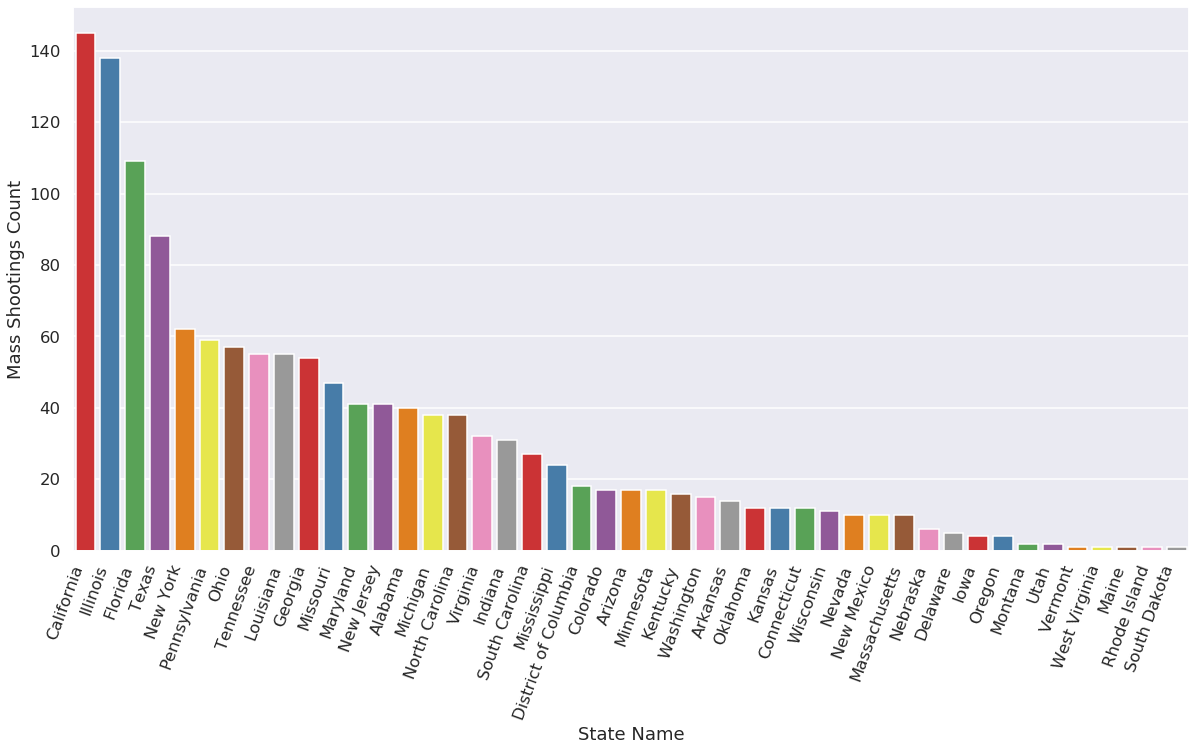

In [114]:
#plot the number of mass shottings per state in the graph
# Seaborn barplot
fig=plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=df,
    x='State',
    palette='Set1', order = df['State'].value_counts().index
)
plt.xlabel("State Name")
plt.ylabel('Mass Shootings Count')
# rotate x label to look cleaner
chart.set_xticklabels(chart.get_xticklabels(), rotation=70, horizontalalignment='right')
plt.show(fig)


## Number of Mass Shootings by State from 2015-2018
### Interpretation

This bar plot shows the number of mass shootings in each state from 2015-2018 in descending order. The x-axis represents the name of the states, the y-axis represents the count of mass shootings.

### Data Analysis

This is just a pre-visualization that helps us to make sense of the raw data as it stands. From this plot, we can see that California, Illinois, and Florida are the top 3 states in number of mass shootings.

However, we also acknowledge the fact that these top states also have more population than other states. Simply compare the absolute number is not justify and we would like to get the information on the population of each state.



### 3.2 Population

In this part, we would like to get the population information of each state into this dataset and then plot the mass shootings distribution in the U.S from 2015-2018 under population density. In order to do that, we need to get the geometry information of each city and add it to our dataframe, then we calculate the mean population of each city from 2015-2018 and add that information to the dataframe too. This will tell us if there is coorelation between population dencity and mass shotting indicent numbers.

The first variable that we decided to explore is the population of each state from 2015-2018.

In [115]:
#Prepare a geotable for geospatial graph
geo_table = gpd.read_file(libpysal.examples.get_path('us48.shp'))
geo_table

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,20.75,34.96,1,1,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615..."
1,45.13,34.53,2,2,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6..."
2,9.57,18.90,3,3,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ..."
3,21.87,21.35,4,4,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939..."
4,22.60,22.75,5,5,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9..."
...,...,...,...,...,...,...,...,...,...
43,7.79,16.13,45,45,South Carolina,45,S Atl,SC,"MULTIPOLYGON (((-81.75976 33.19523, -81.77004 ..."
44,13.52,20.88,46,46,Arkansas,05,W S Cen,AR,"POLYGON ((-94.46148 34.19666, -94.45241 34.508..."
45,11.22,32.57,47,47,Louisiana,22,W S Cen,LA,"MULTIPOLYGON (((-93.70736 30.23937, -93.69921 ..."
46,13.35,41.09,48,48,Florida,12,S Atl,FL,"MULTIPOLYGON (((-80.78589 28.78493, -80.76264 ..."


In [116]:
#Merge count_df and geo_table
count_df = count_df.rename(columns={'State': 'STATE_NAME'})
count_df = count_df.merge(geo_table,on='STATE_NAME')


In [117]:
# Load population into a dataframe 
df_population = pd.read_csv('population.csv')
df_population


,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.00,0.00,2.55,2.75,2.70,2.99,3.33,3.32,2.94,3.00
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.65,-5.22,0.85,0.04,-0.40,-0.92,-2.01,-2.43,-1.80,-1.13
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.37,-2.30,-1.04,-0.90,0.04,-0.72,-1.36,-1.23,-0.52,-0.43
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,...,2.96,2.78,5.38,5.84,5.29,6.21,7.33,7.23,6.25,6.15
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,...,1.48,1.35,2.69,3.23,3.34,4.15,5.13,5.37,4.16,3.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,40,4,9,53,Washington,6724540,6724540,6742902,6821655,6892876,...,8.79,6.22,6.18,4.99,4.92,7.65,10.70,13.26,13.03,10.31
53,40,3,5,54,West Virginia,1852994,1853001,1854214,1856074,1856764,...,-5.54,-3.88,1.82,0.87,-0.80,-1.76,-2.56,-4.36,-5.36,-3.67
54,40,2,3,55,Wisconsin,5686986,5687282,5690479,5704755,5719855,...,-0.57,-0.17,-0.84,-0.77,0.11,-0.39,-1.06,-0.65,0.72,1.21
55,40,4,8,56,Wyoming,563626,563773,564483,567224,576270,...,-14.69,-6.37,-0.50,10.16,4.95,-4.76,0.29,-7.15,-13.62,-5.34


In [118]:
# Keep the populations from 2015-2018
df_population = df_population[['NAME','POPESTIMATE2015', 'POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018']]
df_population


,NAME,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,United States,320742673,323071342,325147121,327167434
1,Northeast Region,56047587,56058789,56072676,56111079
2,Midwest Region,67869139,67996917,68156035,68308744
3,South Region,121037542,122401186,123598424,124753948
4,West Region,75788405,76614450,77319986,77993663
...,...,...,...,...,...
52,Washington,7163543,7294680,7425432,7535591
53,West Virginia,1841996,1830929,1817048,1805832
54,Wisconsin,5761406,5772958,5792051,5813568
55,Wyoming,585668,584290,578934,577737


In [119]:
# Calculate the mean population from 2015-2018
df_population['MEAN_POPULATION'] = df_population.mean(axis=1)
df_population = df_population[['NAME', 'MEAN_POPULATION']]
df_population

,NAME,MEAN_POPULATION
0,United States,3.24e+08
1,Northeast Region,5.61e+07
2,Midwest Region,6.81e+07
3,South Region,1.23e+08
4,West Region,7.69e+07
...,...,...
52,Washington,7.35e+06
53,West Virginia,1.82e+06
54,Wisconsin,5.78e+06
55,Wyoming,5.82e+05


In [120]:
# Merge population dataframe with the geo table
population = df_population.rename(columns={'NAME': 'STATE_NAME'})
population = population.merge(geo_table, on='STATE_NAME')

In [121]:
population

,STATE_NAME,MEAN_POPULATION,AREA,PERIMETER,STATE_,STATE_ID,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Alabama,4.87e+06,12.90,17.24,42,42,01,E S Cen,AL,"POLYGON ((-85.07014 31.98055, -85.11522 31.907..."
1,Arizona,7.00e+06,28.86,23.26,36,36,04,Mtn,AZ,"POLYGON ((-114.51984 33.02767, -114.55830 33.0..."
2,Arkansas,3.00e+06,13.52,20.88,46,46,05,W S Cen,AR,"POLYGON ((-94.46148 34.19666, -94.45241 34.508..."
3,California,3.93e+07,41.53,42.26,24,24,06,Pacific,CA,"MULTIPOLYGON (((-121.66415 38.16937, -121.7813..."
4,Colorado,5.58e+06,28.04,22.02,31,31,08,Mtn,CO,"POLYGON ((-102.04400 37.64146, -102.04156 37.3..."
...,...,...,...,...,...,...,...,...,...,...
43,Virginia,8.44e+06,10.51,31.20,34,34,51,S Atl,VA,"MULTIPOLYGON (((-79.14433 36.54606, -79.21706 ..."
44,Washington,7.35e+06,20.75,34.96,1,1,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615..."
45,West Virginia,1.82e+06,6.49,18.20,29,29,54,S Atl,WV,"POLYGON ((-79.23190 38.48037, -79.27260 38.437..."
46,Wisconsin,5.78e+06,16.48,21.89,7,7,55,E N Cen,WI,"MULTIPOLYGON (((-87.74845 44.96163, -87.83989 ..."


In [122]:
# Load the cities' coordinates into a dataframe
dfcoord = pd.read_csv('uscities.csv')
dfcoord = dfcoord[['city','lat', 'lng']]
dfcoord = dfcoord.drop_duplicates(subset='city', keep="first")
dfcoord


,city,lat,lng
0,South Creek,47.00,-122.39
1,Roslyn,47.25,-121.10
2,Sprague,47.30,-117.97
3,Gig Harbor,47.34,-122.60
4,Lake Cassidy,48.06,-122.09
...,...,...,...
28878,Lake Norden,44.58,-97.21
28880,Colome,43.26,-99.72
28881,Okreek,43.35,-100.38
28883,Willow Lake,44.63,-97.64


In [123]:
# Merge df with the cities' coordinates 
temp = df.rename(columns={'City Or County': 'city'})
temp = temp.merge(dfcoord, on='city')

In [124]:
# Remove outlier
temp = temp[temp.lng > -125]

In [125]:
# Add a geometry column, a requirement for geospatial graph 
geometry = pd.Series()
for i in temp.index:
    geometry.loc[i] = Point((temp.loc[i,'lng'],temp.loc[i,'lat']))
temp['geometry'] = geometry
temp

,Incident Date,State,city,# Killed,# Injured,lat,lng,geometry
0,"January 1, 2015",Tennessee,Memphis,0,5,27.54,-82.56,POINT (-82.5607 27.5435)
1,"August 30, 2015",Tennessee,Memphis,1,4,27.54,-82.56,POINT (-82.5607 27.5435)
2,"October 10, 2015",Tennessee,Memphis,0,6,27.54,-82.56,POINT (-82.5607 27.5435)
3,"January 7, 2016",Tennessee,Memphis,1,3,27.54,-82.56,POINT (-82.5607 27.5435)
4,"April 9, 2016",Tennessee,Memphis,0,4,27.54,-82.56,POINT (-82.5607 27.5435)
...,...,...,...,...,...,...,...,...
1276,"November 13, 2018",New Mexico,Gallup,4,1,35.52,-108.74,POINT (-108.7423 35.5183)
1277,"November 25, 2018",Alabama,Demopolis,2,2,32.50,-87.83,POINT (-87.82980000000001 32.498)
1278,"November 26, 2018",Tennessee,Powell,0,4,44.80,-108.77,POINT (-108.7682 44.7963)
1279,"December 11, 2018",Louisiana,Natchitoches,1,3,31.73,-93.10,POINT (-93.0979 31.7317)


In [126]:
#Add a count of shootings col for each city
temp['city_count'] = temp.groupby(['city'])['city'].transform('count')

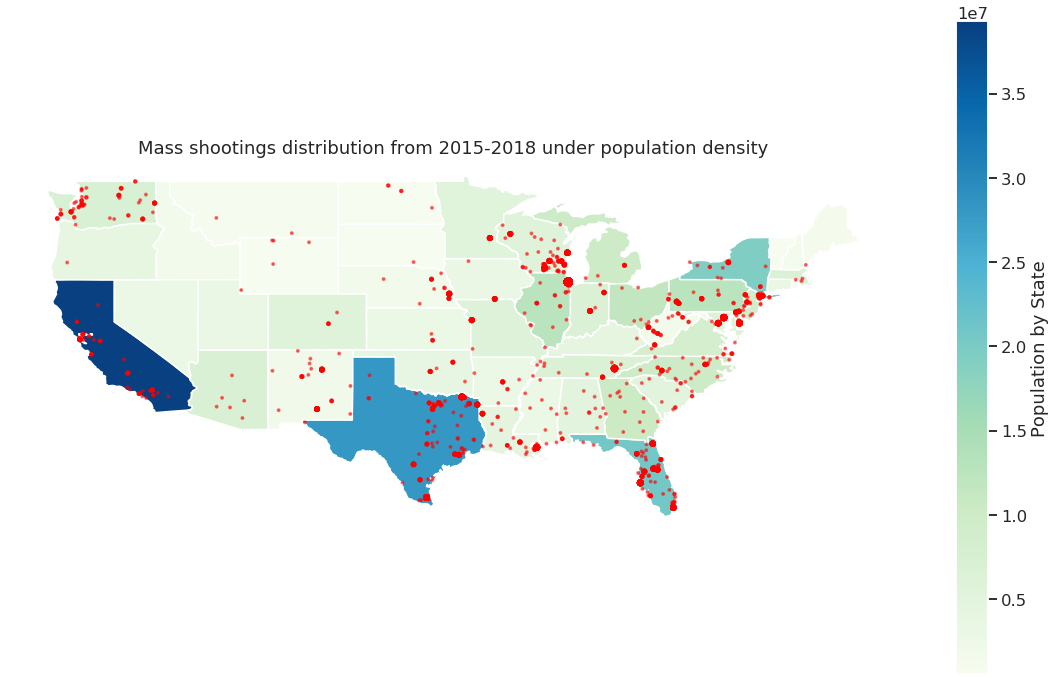

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (20,12)) # figsize to be changed
gpd_population = gpd.GeoDataFrame(population)
# tempgpd = gpd.GeoDataFrame(temp)
base = gpd_population.plot(ax=ax, column= 'MEAN_POPULATION', cmap='GnBu', legend=True,
                          legend_kwds={'label': "Population by State"})
leg = ax.get_legend()
plt.scatter(y=temp["lat"], x = temp["lng"], alpha = 0.5, marker='o', color='red', s=6*np.sqrt(temp['city_count'])) #adjust size of dot by city count
plt.axis('off')
plt.title('Mass shootings distribution from 2015-2018 under population density')
plt.show()

In [128]:
t_value, p_value = stats.ttest_ind(temp['lat'], temp['# Injured'])
t_value

84.55069463187749

## Mass shootings distribution from 2015-2018 under population density

### Interpretation

This geospatial plot shows the mass shootings distribution in the U.S from 2015-2018 under population density. A single red dot represents a city that has a mass shooting in the above period, with the size scaled up if there are multiple shootings. The shades of blue and green represent each state' population: states with bluer color has more population. <br>
The dots are not uniformly distributed. There are states with a lot of mass shootings such as California and Florida, and others with no shootings such as Nevada and Utah.

### Data Analysis

So in the geospatial plot above we could have a sense that there actually is a correlation between population and number of mass shootings. We could see that states with more population has a high rate of mass shootings. It makes sense because with more people there will be more chances for everything including gun violence. That is why usually for stating mass shootings in each states they do it per 100k or per million people. So a state like Alaska with more lenient gun policy has 180 death rate by guns and a state like california has 3184 gun violence but since the population of california is 39,747,267 and the population of Alaska is 735,720, Death Rate (per 100k people) for Alaska is 24.50% and for Clifornia is 7.90%. http://worldpopulationreview.com/states/gun-violence-by-state/


### 3.3 Gun Policy


In [129]:
# Read data of gun law by state into a dataframe
df_gunpolicy = pd.read_csv('gunlawstrength.csv')
df_gunpolicy

,GUN LAW STRENGTH (RANKED),STATE,2018 GRADE,GUN DEATH RATE (RANKED),GUN DEATH RATE (PER 100K)
0,1,California,A,44,7.8
1,2,New Jersey,A,45,5.3
2,3,Connecticut,A-,46,5.1
3,4,Maryland,A-,29,12.3
4,5,Massachusetts,A-,49,3.7
...,...,...,...,...,...
45,46,Arizona,F,18,15.7
46,47,Missouri,F,6,21.3
47,48,Idaho,F,15,16.4
48,48,Wyoming,F,8,18.7


In [130]:
# Merge df_gunpolicy with geo_table, required for geospatial plot
df_gunpolicy = df_gunpolicy.rename(columns={'STATE': 'STATE_NAME'})
df_gunpolicy = df_gunpolicy.merge(geo_table, on='STATE_NAME')


In [131]:
#Add a coordinate column in order to add labels to the states
df_gunpolicy['coords'] = df_gunpolicy['geometry'].apply(lambda x: x.representative_point().coords[:])
df_gunpolicy['coords'] = [coords[0] for coords in df_gunpolicy['coords']]
df_gunpolicy

,GUN LAW STRENGTH (RANKED),STATE_NAME,2018 GRADE,GUN DEATH RATE (RANKED),GUN DEATH RATE (PER 100K),AREA,PERIMETER,STATE_,STATE_ID,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,coords
0,1,California,A,44,7.8,41.53,42.26,24,24,06,Pacific,CA,"MULTIPOLYGON (((-121.66415 38.16937, -121.7813...","(-120.00924331104378, 37.29582595825195)"
1,2,New Jersey,A,45,5.3,2.06,8.42,20,20,34,Mid Atl,NJ,"POLYGON ((-75.48964 39.71474, -75.47633 39.719...","(-74.37764544111192, 40.16340637207031)"
2,3,Connecticut,A-,46,5.1,1.39,5.72,18,18,09,N Eng,CT,"POLYGON ((-73.53082 41.52265, -73.51758 41.665...","(-72.66026049545243, 41.56192970275879)"
3,4,Maryland,A-,29,12.3,2.62,21.88,30,30,24,S Atl,MD,"MULTIPOLYGON (((-75.71106 38.64955, -75.70742 ...","(-76.72408804171778, 38.85972785949707)"
4,5,Massachusetts,A-,49,3.7,2.31,13.11,14,14,25,N Eng,MA,"MULTIPOLYGON (((-71.31983 41.77209, -71.34030 ...","(-72.09162515290728, 42.19374084472656)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,46,Arizona,F,18,15.7,28.86,23.26,36,36,04,Mtn,AZ,"POLYGON ((-114.51984 33.02767, -114.55830 33.0...","(-111.67611563511193, 34.15624809265137)"
44,47,Missouri,F,6,21.3,18.65,23.60,35,35,29,W N Cen,MO,"POLYGON ((-89.10497 36.95387, -89.12959 36.866...","(-92.49264906395838, 38.27892875671387)"
45,48,Idaho,F,15,16.4,24.39,28.53,8,8,16,Mtn,ID,"POLYGON ((-117.02531 43.67915, -117.02280 43.7...","(-115.47965192564584, 45.49642753601074)"
46,48,Wyoming,F,8,18.7,27.97,21.99,6,6,56,Mtn,WY,"POLYGON ((-104.05311 41.69825, -104.05499 41.5...","(-107.55158804185346, 42.80889892578125)"


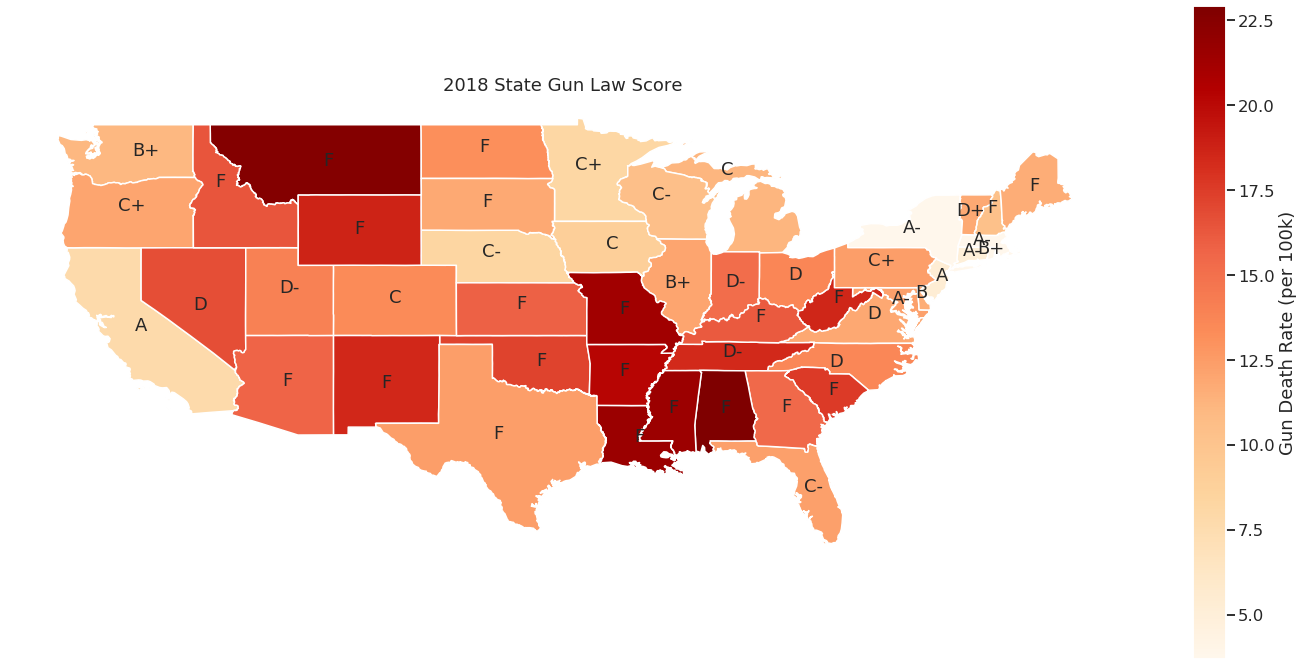

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (25,12))
gpd_gunpolicy = gpd.GeoDataFrame(df_gunpolicy)
base = gpd_gunpolicy.plot(ax=ax, column= 'GUN DEATH RATE (PER 100K)', cmap='OrRd', legend=True, legend_kwds={'label': "Gun Death Rate (per 100k)"})
for idx, row in gpd_gunpolicy.iterrows():
    plt.annotate(s=row['2018 GRADE'],xy=row['coords'],
                 horizontalalignment='center')
# Optional: Scatter to show the mass shootings
# plt.scatter(y=temp["lat"], x = temp["lng"], alpha = 0.5, marker='o', color='red', s=10*np.sqrt(temp['city_count']))
plt.axis('off')
plt.title('2018 State Gun Law Score ')
plt.show()


## 2018 State Gun Law Score

### Interpretation

This geospatial plot shows a map of the US with each states' gun law score (from A to F with A being the most strict and F being more lenient. The shades of red show the amount of gun deaths in each state.

Note: Not uniformly distributed 

### Data Analysis

This plot allows us to compare the strictness of gun laws to the amount of gun deaths. From this graph, states with lenient rateings (D, F) tended to have more gun deaths that year. Additionally, states with strict gun control laws (A, B) had lower amounts of deaths from guns.

The plot above shows a strong correlation between gun control laws and gun deaths. This graph however does not show that mass shootings are related to gun control laws. This is due to the fact that 'gun deaths' includes other occurrences such as suicide, violent crime, self-defense, and accidental deaths.


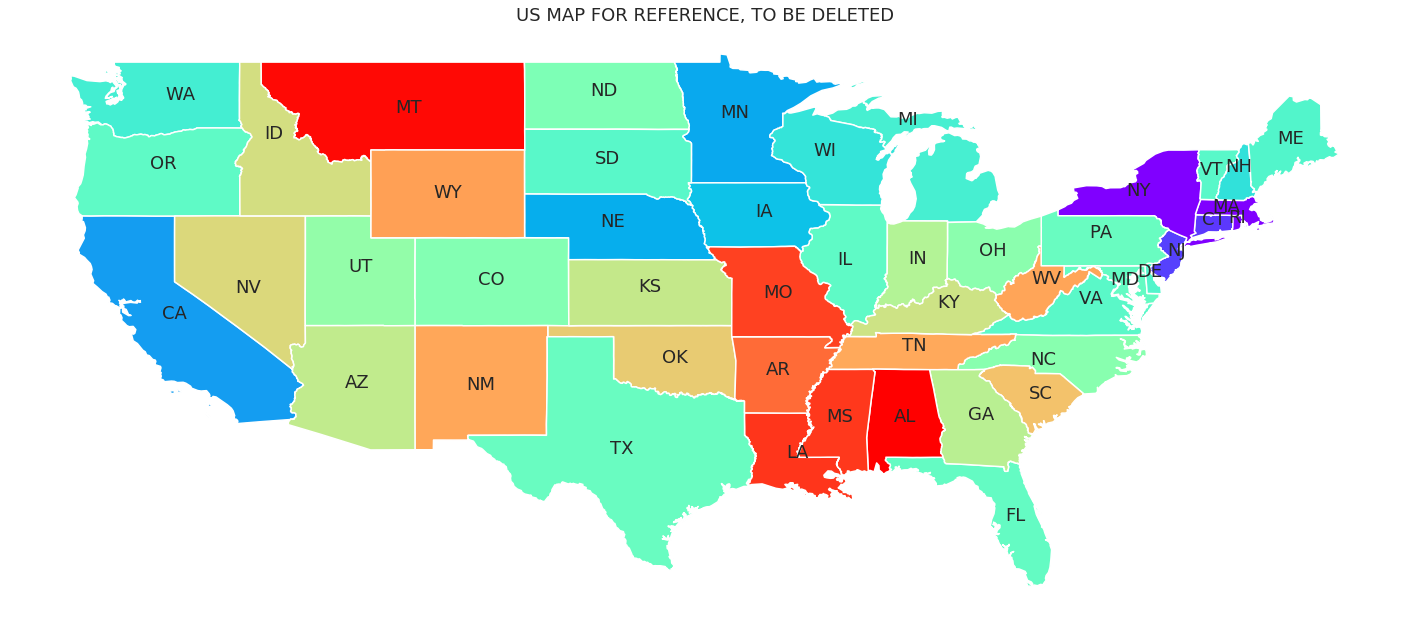

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (25,12))
gpd_gunpolicy = gpd.GeoDataFrame(df_gunpolicy)
base = gpd_gunpolicy.plot(ax=ax, column= 'GUN DEATH RATE (PER 100K)', cmap='rainbow')
for idx, row in gpd_gunpolicy.iterrows():
    plt.annotate(s=row['STATE_ABBR'],xy=row['coords'],
                 horizontalalignment='center')
plt.axis('off')
plt.title('US MAP FOR REFERENCE, TO BE DELETED')
plt.show()


### 3.3 Gun Law vs Mass Shootings


In [134]:
#Merge mass shootings df and gun law df
df_scatter = count_df.merge(df_gunpolicy,on='STATE_NAME')
df_scatter

,STATE_NAME,Shootings,AREA_x,PERIMETER_x,STATE__x,STATE_ID_x,STATE_FIPS_x,SUB_REGION_x,STATE_ABBR_x,geometry_x,...,GUN DEATH RATE (PER 100K),AREA_y,PERIMETER_y,STATE__y,STATE_ID_y,STATE_FIPS_y,SUB_REGION_y,STATE_ABBR_y,geometry_y,coords
0,Tennessee,55,10.88,21.46,39,39,47,E S Cen,TN,"POLYGON ((-83.95470 35.45546, -84.01265 35.407...",...,18.4,10.88,21.46,39,39,47,E S Cen,TN,"POLYGON ((-83.95470 35.45546, -84.01265 35.407...","(-86.31700629724438, 35.83477592468262)"
1,Georgia,54,14.60,20.10,44,44,13,S Atl,GA,"MULTIPOLYGON (((-85.13023 31.77869, -85.13163 ...",...,15.4,14.60,20.10,44,44,13,S Atl,GA,"MULTIPOLYGON (((-85.13023 31.77869, -85.13163 ...","(-83.25166803132484, 32.6812744140625)"
2,Texas,88,65.06,64.81,40,40,48,W S Cen,TX,"MULTIPOLYGON (((-105.99836 31.39382, -106.2127...",...,12.4,65.06,64.81,40,40,48,W S Cen,TX,"MULTIPOLYGON (((-105.99836 31.39382, -106.2127...","(-99.64643196200913, 31.166861534118652)"
3,Virginia,32,10.51,31.20,34,34,51,S Atl,VA,"MULTIPOLYGON (((-79.14433 36.54606, -79.21706 ...",...,11.9,10.51,31.20,34,34,51,S Atl,VA,"MULTIPOLYGON (((-79.14433 36.54606, -79.21706 ...","(-78.23740390508686, 37.99645805358887)"
4,Florida,109,13.35,41.09,48,48,12,S Atl,FL,"MULTIPOLYGON (((-80.78589 28.78493, -80.76264 ...",...,12.3,13.35,41.09,48,48,12,S Atl,FL,"MULTIPOLYGON (((-80.78589 28.78493, -80.76264 ...","(-81.70001563029163, 28.109305381774902)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,South Dakota,1,22.60,22.75,5,5,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",...,11.8,22.60,22.75,5,5,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...","(-100.257863681294, 44.368736267089844)"
40,Washington,15,20.75,34.96,1,1,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",...,11.1,20.75,34.96,1,1,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...","(-119.72064210624406, 47.27300834655762)"
41,West Virginia,1,6.49,18.20,29,29,54,S Atl,WV,"POLYGON ((-79.23190 38.48037, -79.27260 38.437...",...,18.6,6.49,18.20,29,29,54,S Atl,WV,"POLYGON ((-79.23190 38.48037, -79.27260 38.437...","(-80.29892549880226, 38.91647720336914)"
42,Utah,2,22.97,19.99,23,23,49,Mtn,UT,"POLYGON ((-114.04646 38.13769, -114.04427 38.5...",...,14.0,22.97,19.99,23,23,49,Mtn,UT,"POLYGON ((-114.04646 38.13769, -114.04427 38.5...","(-111.54578241685914, 39.439592361450195)"


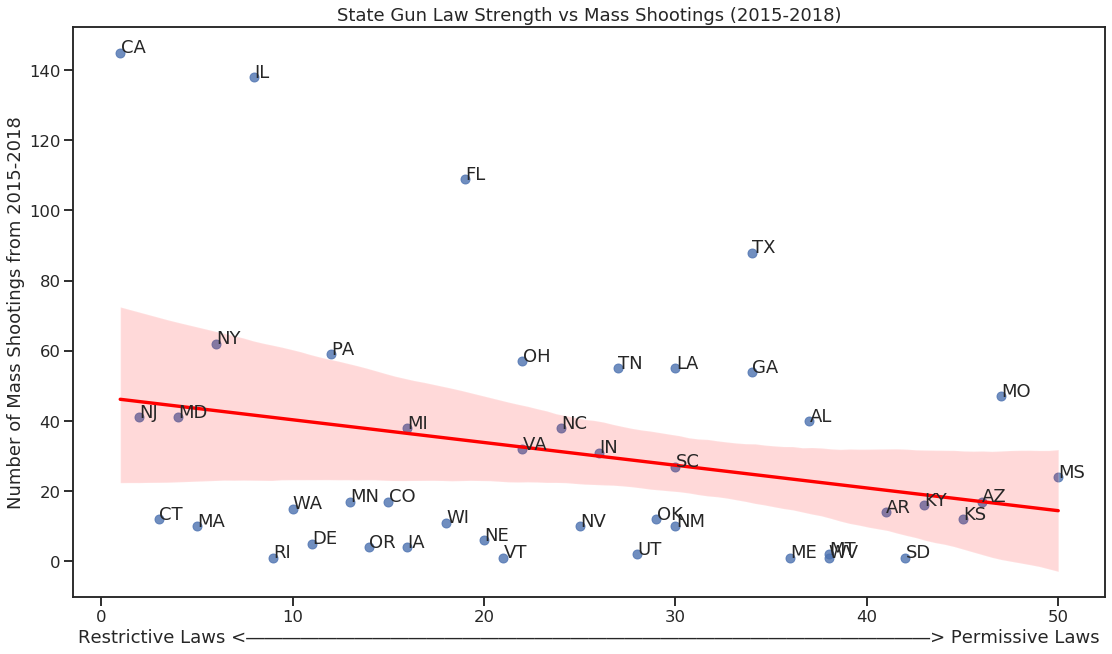

In [135]:
# df_scatter.plot.scatter(x='GUN LAW STRENGTH (RANKED)', y='Shootings')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x="GUN LAW STRENGTH (RANKED)", y="Shootings", data=df_scatter, line_kws={"color": "red"}, truncate=True)
plt.title('State Gun Law Strength vs Mass Shootings (2015-2018)')
# Set x-axis label
plt.xlabel('Restrictive Laws <――――――――――――――――――――――――――――――――――――――> Permissive Laws')
# Set y-axis label
plt.ylabel('Number of Mass Shootings from 2015-2018') # Change to just 2018??

# Function to label the points as states
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_scatter['GUN LAW STRENGTH (RANKED)'], df_scatter['Shootings'], df_scatter['STATE_ABBR_x'], plt.gca())

plt.show()

In [147]:
t_value_0, p_value_0 = stats.ttest_ind(df_scatter['Shootings'], df_scatter['GUN LAW STRENGTH (RANKED)'])
p_value_0

0.17956714722184852

## State Gun Law Strength vs Mass Shootings (2015-2018)

### Interpretation

This regression plot shows a map of the US with each states' gun law score (from A to F with A being the most strict and F being more lenient. The shades of red show the amount of gun deaths in each state.

Note: Not uniformly distributed 

### Data Analysis

Should we keep this to have more stuff to talk about? Basically saying we forgot to take into account population density (divide number of mass shootings by population), so the variables have negative correlation 



In [136]:
df_scatter2 = count_df.merge(population,on='STATE_NAME')
df_scatter2 = df_scatter2[['STATE_NAME','Shootings', 'MEAN_POPULATION']]
df_scatter2['SHOOTINGS_PER_MILLION'] = df_scatter2['Shootings'].apply(float)/(df_scatter2['MEAN_POPULATION'] / 1000000)
df_scatter2

,STATE_NAME,Shootings,MEAN_POPULATION,SHOOTINGS_PER_MILLION
0,Tennessee,55,6.68e+06,8.24
1,Georgia,54,1.04e+07,5.22
2,Texas,88,2.81e+07,3.13
3,Virginia,32,8.44e+06,3.79
4,Florida,109,2.08e+07,5.24
...,...,...,...,...
39,South Dakota,1,8.68e+05,1.15
40,Washington,15,7.35e+06,2.04
41,West Virginia,1,1.82e+06,0.55
42,Utah,2,3.07e+06,0.65


In [137]:
#Merge mass shootings df and gun law df
df_scatter2 = df_scatter2.merge(df_gunpolicy,on='STATE_NAME')
# df_scatter2

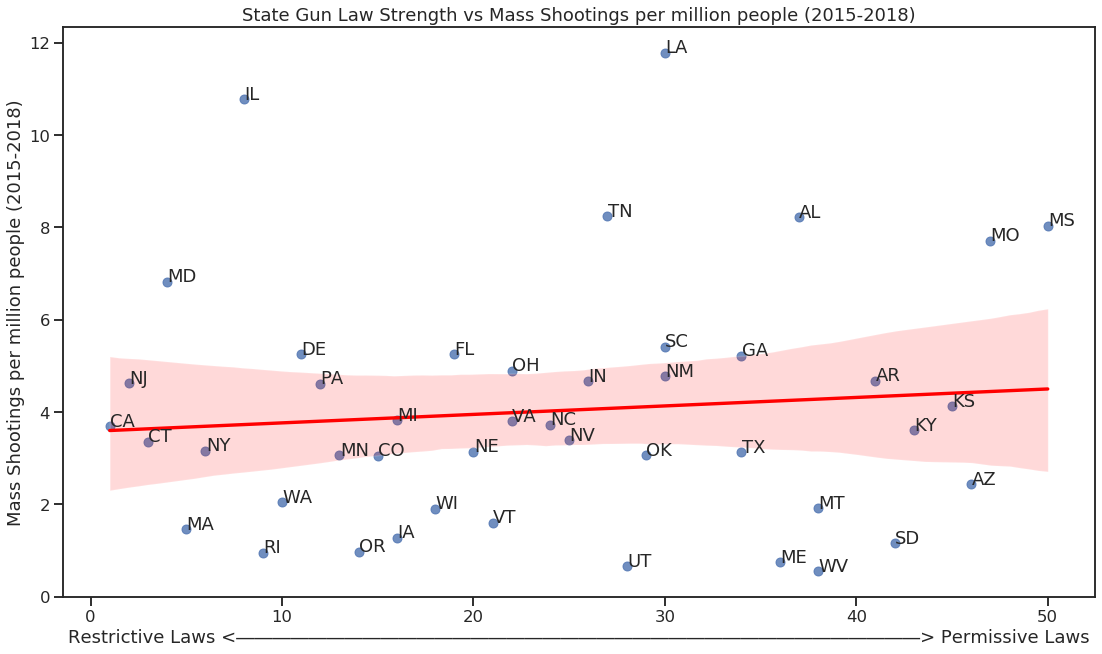

In [138]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x="GUN LAW STRENGTH (RANKED)", y="SHOOTINGS_PER_MILLION", data=df_scatter2, line_kws={"color": "red"}, truncate=True)
plt.title('State Gun Law Strength vs Mass Shootings per million people (2015-2018)')
# Set x-axis label
plt.xlabel('Restrictive Laws <――――――――――――――――――――――――――――――――――――――> Permissive Laws')
# Set y-axis label
plt.ylabel('Mass Shootings per million people (2015-2018)') # Change to just 2018??

# Function to label the points as states
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_scatter2['GUN LAW STRENGTH (RANKED)'], df_scatter2['SHOOTINGS_PER_MILLION'], df_scatter2['STATE_ABBR'], plt.gca())

plt.show()

## T-test for significance 
Since we have the visualization, we would like to test it for significance. 

To start we set out hypothesis:

Ho: There is no association between law strictness and mass shootings per million people 

Ha: There is no association between law strictness and mass shootings per million people

Alpha: 0.05


In [143]:
t_value, p_value = stats.ttest_ind(df_scatter2['SHOOTINGS_PER_MILLION'], df_scatter2['GUN LAW STRENGTH (RANKED)'])
t_value

-9.324964090910854

In [145]:
p_value

1.0722786803118152e-14

# State Gun Law Strength vs Mass Shootings (2015-2018)

### Interpretation

This regression plot shows the strictness of state gun laws with respect to the number of mass shootings per million people from 2015-2018. <br>

The x-axis represents the strictness of state gun laws, states with stricter gun laws will be on the left, and states with more lenient gun laws will be on the right of the plot. The y-axis represent the mass shootings per million from 2015-2018

Note: Not uniformly distributed?

Outliers: Illinois, Louisiana

### Data Analysis

In the regression plot above we could see that mass shootings are strongly correlated by a state’s access to guns. It fits the narrative, as mass public shootings are rooted in the much too readily available weapons of mass killings, usually assault weapons. The states with the highest gun death rates are often the states with relatively loose gun restrictions. Terrorist acts like those committed in El Paso and Dayton are more likely to keep happening to people who live in places where it’s easy to buy, sell, and carry guns. When they compared those scores to mass shootings per million residents, they found that for every 10-point relaxation in a state’s gun laws, the rates of mass shootings in that state increased by 11.5 percent. This trend showed up even after the models were adjusted for population demographics like household income, unemployment, poverty, education, incarceration rates, and race. The eight most restrictive states include Hawaii, Massachusetts, New Jersey, Connecticut, Maryland, California, Illinois, and New York. Leading the pack in both permissive laws and mass shooting rate were Vermont, South Carolina, Louisiana, and Arizona.Both Texas and Ohio, where the latest terror attacks were carried out, also scored high on gun law permissibility. In both states it’s legal to carry concealed weapons in public, provided the gun owner has the proper permits to own it.


# 4. Ethics and Privacy:
For this project, the data analyzed was gathered from online databases. The online data itself does not have any ethical concern- as most mass shooting cases are reported widely by the media and are highly publicized. This project does not violate an individual’s right to privacy, as victims of mass shooting and perpetrators are part of public records and thus the individual’s involved do not have the right to privacy (with the exception of minors). The only ethical concern about individual’s privacy may be relevant to the project the cases involving minors, where state and federal statutes protects the individual from being publicized. However, in the given context, this project does not use any individual name, location or personal information, which effectively protects the privacy of any minors who might be protected by federal and/or state laws. Specific addresses of shooting locations were removed from the datasets in used and only regional/state information was taken into account. 








# 5. Conclusions and Discussions:

In this project, we wanted to observe the relationship between  local gun policies and the number of mass shootings that occur within each state. We refined our scope by asking, "does a state with a strict gun policy typically have fewer mass shootings?". Our group hypothesized  that the number of mass shootings in a state **is** strongly correlated with how strict its gun policy is. 

The correlation between gun law strictness and mass shootings seemed at first like it would be an obvious strong correlation, however initial data seemed to go against this. Our initial plot showed the areas where mass shootings often occur but not its correlation. Then when we looked at the correlation between gun deaths and gun law strictness, we saw that there was a relatively strong correlation. This however was for gun deaths in general, not just mass shootings. When we looked at the relationship between mass shootings and state gun law strictness, we actually found a negative correlation. Initially, this made it seem as if the opposite of what we thought was true. We however then realized that the reason for this was population which led us to do a regression plot.

In the regression plot we showed that mass shootings are correlated, albeit weakly, by a state’s access to guns. We showed in the regression plot that per million residents, Mass shootings are more likely to happen to people who live in places where it’s easy to buy, sell, and carry guns in other words in states with weaker Gun Policies. For example, Texas and Ohio, where the latest terror attacks were carried out along with many others, scored high on gun law permissibility. In both states it’s legal to carry concealed weapons in public, provided the gun owner has the proper permits to own it. It is important to note that while there is a correlation to gun law strictness, population density likely plays an even bigger role in the amount of mass shootings. This however, would take further study beyond what our hypothesis was testing.

